<a href="https://colab.research.google.com/github/souhub/research/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.python import keras as K

In [7]:
# A neural network that has 2 layers.
model = K.Sequential([
    K.layers.Dense(units=4, input_shape=((2,)),activation="sigmoid"),
    K.layers.Dense(units=4)
])

# A batch whose size is 3.
batch=np.random.rand(3,2)

y=model.predict(batch)
print(y)

[[ 0.4481186   0.2260507  -0.12044048  0.394045  ]
 [ 0.3615101   0.25825977 -0.11568062  0.32223248]
 [ 0.34993953  0.20073038 -0.10865635  0.3771503 ]]


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.python import keras as K

In [16]:
dataset=load_boston()
y=dataset.target
X=dataset.data

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [18]:
model=K.Sequential([
                    K.layers.BatchNormalization(input_shape=(13,)),
                    K.layers.Dense(units=13,activation="softplus",kernel_regularizer="l1"),
                    K.layers.Dense(units=1)
])

In [21]:
model.compile(loss="mean_squared_error",optimizer="sgd")
model.fit(X_train,y_train,epochs=8)

Epoch 1/8
11/11 [==============================] - 0s 2ms/step - loss: 162.9147
Epoch 2/8
11/11 [==============================] - 0s 1ms/step - loss: 60.7867
Epoch 3/8
11/11 [==============================] - 0s 1ms/step - loss: 32.1626
Epoch 4/8
11/11 [==============================] - 0s 1ms/step - loss: 44.2915
Epoch 5/8
11/11 [==============================] - 0s 2ms/step - loss: 30.3836
Epoch 6/8
11/11 [==============================] - 0s 1ms/step - loss: 31.1253
Epoch 7/8
11/11 [==============================] - 0s 1ms/step - loss: 22.5479
Epoch 8/8
11/11 [==============================] - 0s 1ms/step - loss: 28.4062


In [23]:
predicts=model.predict(X_test)

In [24]:
result=pd.DataFrame({
    "predict":np.reshape(predicts,(-1,)),
    "actual":y_test
})

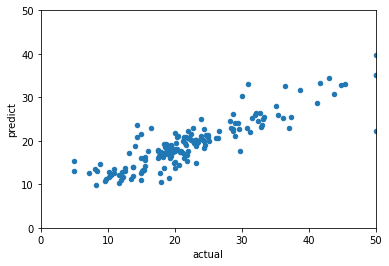

In [25]:
limit=np.max(y_test)
result.plot.scatter(x="actual",y="predict",xlim=(0,limit),ylim=(0,limit))
plt.show()